# EDA
- We will look at US domestic flights from 2019.
- Do some exploratory analysis.
- Maybe finish with ML algorithm to predict delays.

## Datasets
- [Flight on-time data](https://www.transtats.bts.gov/)
- [Airline & Aiports database](https://openflights.org/data.html)

In [127]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

data_path = 'C:/Users/Zaca/Documents/Datasets/flights/'

In [3]:
# open file (1.3GB so it will be slow)
flights = pd.read_csv(data_path + '2019.csv', index_col=0)

C:\Users\Zaca\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [23]:
cols = pd.read_csv(data_path + '2019/columns.txt', sep=',', names=['colname', 'coldesc'], index_col= False)
cols

,colname,coldesc
0,FlightDate,Flight Date (yyyymmdd)
1,Reporting_Airline,Unique Carrier Code
2,Flight_Number_Reporting_Airline,Flight Number
3,OriginAirportID,Airport ID
4,Origin,Origin Airport
5,OriginCityName,City Name
6,OriginState,Origin Airport State Code
7,DestAirportID,Destination AirportID
8,Dest,Destination Airport
9,DestCityName,Destination Airport City Name


In [4]:
# examine top 5 rows
flights.head()

,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,Origin,OriginCityName,OriginState,DestAirportID,Dest,DestCityName,...,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2019-01-04,OO,5657,14698,SBP,"San Luis Obispo, CA",CA,14771,SFO,"San Francisco, CA",...,0.0,70.0,51.0,37.0,190.0,0.0,0.0,0.0,0.0,0.0
1,2019-01-04,OO,5658,12266,IAH,"Houston, TX",TX,15919,XNA,"Fayetteville, AR",...,0.0,103.0,109.0,76.0,438.0,0.0,0.0,0.0,0.0,0.0
2,2019-01-04,OO,5658,14783,SGF,"Springfield, MO",MO,12266,IAH,"Houston, TX",...,0.0,132.0,121.0,88.0,513.0,0.0,0.0,0.0,0.0,0.0
3,2019-01-04,OO,5659,12389,ISN,"Williston, ND",ND,11292,DEN,"Denver, CO",...,0.0,118.0,110.0,80.0,576.0,0.0,0.0,0.0,0.0,0.0
4,2019-01-04,OO,5660,13342,MKE,"Milwaukee, WI",WI,11292,DEN,"Denver, CO",...,0.0,184.0,163.0,127.0,896.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# examine dtypes
flights.dtypes

FlightDate                          object
Reporting_Airline                   object
Flight_Number_Reporting_Airline      int64
OriginAirportID                      int64
Origin                              object
OriginCityName                      object
OriginState                         object
DestAirportID                        int64
Dest                                object
DestCityName                        object
DestState                           object
CRSDepTime                           int64
DepTime                            float64
DepDelay                           float64
TaxiOut                            float64
WheelsOff                          float64
WheelsOn                           float64
TaxiIn                             float64
CRSArrTime                           int64
ArrTime                            float64
ArrDelay                           float64
Cancelled                          float64
Diverted                           float64
CRSElapsedT

In [6]:
print(flights.shape[0])

7422037


### Holy sh!t there are 7.4 million flights in our dataset.
- Let's try to look at the first few columns.

1. Flight date is in object format, let's turn in into date-time for timeseries analysis.
2. Reporting airline are abbreviated (IATA codes), we need to find an actual human name for them.

## Airlines

In [7]:
# loot at unique values for Airlines.
airlines = flights.Reporting_Airline.unique()
print(airlines)

# there's only 17 of them... megacorporations...

['OO' 'AS' '9E' 'AA' 'MQ' 'WN' 'G4' 'OH' 'B6' 'NK' 'DL' 'YV' 'EV' 'F9'
 'YX' 'UA' 'HA']


In [76]:
# I found an Airline dataset we can try to use to translate IATA codes.
airlines_ds = pd.read_csv(data_path + 'world_airlines.csv', index_col=0, names=['NAME', 'ALIAS', 'IATA', 'ICAO', 'CALLSIGN', 'COUNTRY', 'ACTIVE'])

In [9]:
# we can make a dictionary to translate codes to actual names
airline_dictionary = {k:airlines_ds.loc[airlines_ds.IATA == k, 'NAME'].values[0] for k in airlines}
airline_dictionary

{'OO': 'SkyWest',
 'AS': 'Alaska Airlines',
 '9E': 'Pinnacle Airlines',
 'AA': 'American Airlines',
 'MQ': 'American Eagle Airlines',
 'WN': 'Southwest Airlines',
 'G4': 'Allegiant Air',
 'OH': 'Comair',
 'B6': 'JetBlue Airways',
 'NK': 'Spirit Airlines',
 'DL': 'Delta Air Lines',
 'YV': 'Mesa Airlines',
 'EV': 'Atlantic Southeast Airlines',
 'F9': 'Frontier Airlines',
 'YX': 'Midwest Airlines',
 'UA': 'United Airlines',
 'HA': 'Hawaiian Airlines'}

In [10]:
# ok this was beautiful.
# let's look at the share of flights between them.
flights.Reporting_Airline.value_counts(normalize=True)

WN    0.183770
DL    0.133654
AA    0.127563
OO    0.112697
UA    0.084331
YX    0.044348
MQ    0.044059
B6    0.040071
OH    0.038979
AS    0.035680
9E    0.034644
YV    0.030704
NK    0.027600
F9    0.018262
EV    0.018146
G4    0.014188
HA    0.011303
Name: Reporting_Airline, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

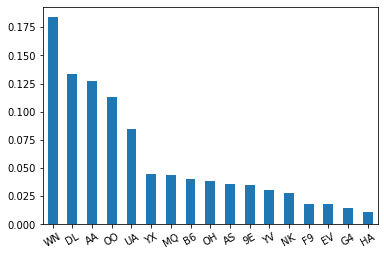

In [11]:
# let's have our first plot shall we?
flights.Reporting_Airline.value_counts(normalize=True).plot.bar()
plt.xticks(rotation=30)

# i will make them beautiful later.

# Airports
- Get database of worldwide Airports to extract information such as latitude, longitude, names, city and so on and merge with the IATA codes in our dataset.

In [97]:
airports_ds = pd.read_csv(data_path + 'world_airports.csv', index_col=0, names=['ID', 'NAME', 'CITY', 'COUNTRY', 'IATA', 'ICAO', 'LATITUDE', 'LONGITUDE', 'ALTITUDE', 'TIMEZONE', 'DST', 'TZ_OLSON', 'TYPE', 'SOURCE'])

In [130]:
# grab all the airports in our dataset
airports = flights.Origin.unique()

# create a dictionary for airport name with IATA codes
airport_dictionary = {k:airports_ds.loc[airports_ds.IATA == k, 'NAME'].values[0] for k in airports}

# apparently there are 2 airports in our dataset that are not present in the database, I could just 
# drop all the flights that involve these locations, bu I kind of like to fix it.
# all we need are their names and their locations

airports_ds = airports_ds[airports_ds.IATA.isin(airports)]
airports_ds

,NAME,CITY,COUNTRY,IATA,ICAO,LATITUDE,LONGITUDE,ALTITUDE,TIMEZONE,DST,TZ_OLSON,TYPE,SOURCE
ID,,,,,,,,,,,,,
1970,Pago Pago International Airport,Pago Pago,American Samoa,PPG,NSTU,-14.331000,-170.710007,32,-11,U,Pacific/Pago_Pago,airport,OurAirports
2244,Saipan International Airport,Saipan,Northern Mariana Islands,SPN,PGSN,15.119000,145.729004,215,10,U,Pacific/Saipan,airport,OurAirports
2246,Antonio B. Won Pat International Airport,Agana,Guam,GUM,PGUM,13.483400,144.796005,298,10,U,Pacific/Guam,airport,OurAirports
2883,Cyril E. King Airport,St. Thomas,Virgin Islands,STT,TIST,18.337299,-64.973396,23,-4,U,America/St_Thomas,airport,OurAirports
2884,Henry E Rohlsen Airport,St. Croix Island,Virgin Islands,STX,TISX,17.701900,-64.798599,74,-4,U,America/St_Thomas,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8314,Hilton Head Airport,Hilton Head Island,United States,HHH,KHXD,32.224400,-80.697502,19,-5,A,America/New_York,airport,OurAirports
9543,Ogden Hinckley Airport,Ogden,United States,OGD,KOGD,41.195900,-112.012001,4473,-7,A,America/Denver,airport,OurAirports
9776,Stillwater Regional Airport,Stillwater,United States,SWO,KSWO,36.161201,-97.085701,1000,-6,A,America/Chicago,airport,OurAirports


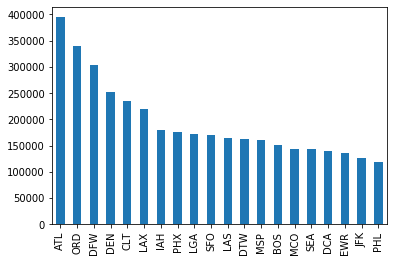

In [122]:
# top 20 airports by number of flights
flights.Origin.value_counts()[:20].plot.bar()

## Dates

In [12]:
flights.FlightDate.dtypes

dtype('O')

In [13]:
# Our flight date is still an object, let's change it to datetime.
flights.FlightDate = pd.to_datetime(flights.FlightDate)

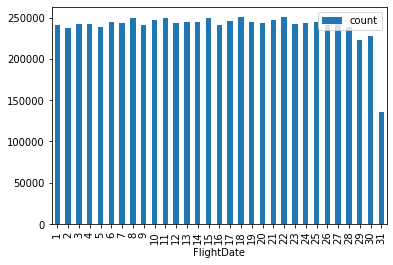

In [69]:

monthly_flights = flights.groupby(flights.FlightDate.dt.day).agg(count=('FlightDate', 'count'))
monthly_flights.plot(kind="bar")

We could explore this dataset forever, I still kind of want to, but let's get to what matters
# Delays
- For now the threshold for delay will be 15 min.

In [120]:
# departure and arrival delays (> threshold)
delay_threshold = 15
flights['delay_on'] = np.where(flights['DepDelay'] >= delay_threshold, 1, 0)
flights['delay_off'] = np.where(flights['ArrDelay'] >= delay_threshold, 1, 0)
flights['delay_averted'] = np.where(flights.delay_on - flights.delay_off == 1, 1, 0)
flights['delay_on_air'] = np.where(flights.delay_on - flights.delay_off == -1, 1, 0)

In [51]:
# calculate total percentage of flights delayed on departure
flights.delay_on.value_counts(normalize=True)

0    0.81647
1    0.18353
Name: delay_on, dtype: float64

In [52]:
# calculate total percentage of flights delayed on arrival
flights.delay_off.value_counts(normalize=True)

0    0.812821
1    0.187179
Name: delay_off, dtype: float64

In [54]:
# calculate total percentage of flights delayed on departure but arrived on time
flights.delay_averted.value_counts(normalize=True)

0    0.962936
1    0.037064
Name: delay_averted, dtype: float64

In [121]:
# calculate total percentage of flights departed on time but arrived late
flights.delay_on_air.value_counts(normalize=True)

0    0.959286
1    0.040714
Name: delay_on_air, dtype: float64

In [58]:
delays_by_airline = flights.pivot_table(index=['Reporting_Airline'], aggfunc={'delay_off': lambda x: np.sum(x)/len(x)}).reset_index()

In [62]:
delays_by_airline.sort_values(by='delay_off', ascending=False)

,Reporting_Airline,delay_off
6,F9,0.250260
3,B6,0.249261
5,EV,0.245309
13,UA,0.211110
1,AA,0.206065
15,YV,0.204873
7,G4,0.204558
9,MQ,0.201350
11,OH,0.192624
16,YX,0.187468


In [135]:
delays_by_airport = flights.pivot_table(index=['Dest'], aggfunc={'delay_off': lambda x: np.sum(x)/len(x)}).reset_index().sort_values(by='delay_off', ascending=False)

In [136]:
delays_by_airport

,Dest,delay_off
274,PSE,0.322034
115,EWR,0.292447
49,BQN,0.285900
222,MKG,0.280605
204,LWB,0.276692
...,...,...
355,WYS,0.060606
205,LWS,0.057460
107,EKO,0.056213
53,BTM,0.048744


# Plotting Airports on Map by % of Flights Delayed

In [145]:
# merge delay data onto location data
delay_map = airports_ds[['IATA','NAME','LATITUDE', 'LONGITUDE']].merge(delays_by_airport[['Dest', 'delay_off']], left_on='IATA', right_on='Dest')

In [146]:
delay_map

,IATA,NAME,LATITUDE,LONGITUDE,Dest,delay_off
0,PPG,Pago Pago International Airport,-14.331000,-170.710007,PPG,0.266667
1,SPN,Saipan International Airport,15.119000,145.729004,SPN,0.097252
2,GUM,Antonio B. Won Pat International Airport,13.483400,144.796005,GUM,0.121573
3,STT,Cyril E. King Airport,18.337299,-64.973396,STT,0.177192
4,STX,Henry E Rohlsen Airport,17.701900,-64.798599,STX,0.171141
...,...,...,...,...,...,...
355,HHH,Hilton Head Airport,32.224400,-80.697502,HHH,0.202418
356,OGD,Ogden Hinckley Airport,41.195900,-112.012001,OGD,0.190476
357,SWO,Stillwater Regional Airport,36.161201,-97.085701,SWO,0.133106
358,XWA,Williston Basin International Airport,48.259722,-103.750556,XWA,0.157895


In [152]:
# making an interactive plot of USA and its airports
# learning plotly express


fig = go.Figure(data=go.Scattergeo(
        lon = delay_map['LONGITUDE'],
        lat = delay_map['LATITUDE'],
        text = delay_map['NAME'] + ' ' + delay_map['delay_off'].astype('str'),
        mode = 'markers',
        marker_color = delays_by_airport['delay_off'],
        ))

fig.update_layout(
        title = 'US Airports',
        geo_scope='usa',
    )
fig.show()

In [138]:
# COOL! I knew how to make them static but I might need to spend a lot of time learning how to customize this